In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
# Print the column names
print(df.columns.tolist())

# Show a sample of the data
print(df.head())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.998

In [4]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [7]:
X = df.drop('quality', axis=1)  # features
y = df['quality']               # target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.39002514396395427
R^2 Score: 0.403180341279623


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

# Negative MSE is used because scikit-learn wants higher scores to be better
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Average Mean Squared Error:", -np.mean(mse_scores))
print("Average R^2 Score:", np.mean(r2_scores))

Average Mean Squared Error: 0.4366293880320982
Average R^2 Score: 0.290041628842196


In [13]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of alpha (regularization strength) values to try
alphas = np.logspace(-3, 3, 20)

# Ridge regression with built-in cross-validation to select best alpha
ridge = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X, y)

print(f"Best alpha: {ridge.alpha_}")

# Evaluate using cross-validation for R^2 and MSE with the best alpha
mse_scores = cross_val_score(RidgeCV(alphas=[ridge.alpha_]), X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(RidgeCV(alphas=[ridge.alpha_]), X, y, cv=5, scoring='r2')

print("Average Mean Squared Error (Ridge):", -np.mean(mse_scores))
print("Average R^2 Score (Ridge):", np.mean(r2_scores))

Best alpha: 0.0379269019073225
Average Mean Squared Error (Ridge): 0.4358654880445604
Average R^2 Score (Ridge): 0.29117192797445435


In [14]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of alpha values to search
alphas = np.logspace(-3, 3, 20)

# Lasso regression with built-in cross-validation to select best alpha
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X, y)

print(f"Best alpha: {lasso.alpha_}")

# Evaluate using cross-validation for R^2 and MSE with the best alpha
mse_scores = cross_val_score(LassoCV(alphas=[lasso.alpha_], cv=5, random_state=42), X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(LassoCV(alphas=[lasso.alpha_], cv=5, random_state=42), X, y, cv=5, scoring='r2')

print("Average Mean Squared Error (Lasso):", -np.mean(mse_scores))
print("Average R^2 Score (Lasso):", np.mean(r2_scores))

# (Optional) See which coefficients are zeroed out for feature selection
print("Lasso Coefficients:", lasso.coef_)

Best alpha: 0.001
Average Mean Squared Error (Lasso): 0.4370403625086324
Average R^2 Score (Lasso): 0.28941976673814623
Lasso Coefficients: [ 0.01254996 -1.07516069 -0.11480936  0.0061315  -1.24839015  0.00461024
 -0.00325887 -0.         -0.36366429  0.78568763  0.29604331]


In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2 adds squares and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original feature count:", X.shape[1])
print("After polynomial feature expansion:", X_poly.shape[1])

Original feature count: 11
After polynomial feature expansion: 77


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [17]:
from sklearn.linear_model import RidgeCV

ridge_poly = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5, scoring='neg_mean_squared_error')
ridge_poly.fit(X_poly_scaled, y)
print("Best alpha (poly):", ridge_poly.alpha_)

Best alpha (poly): 54.555947811685144


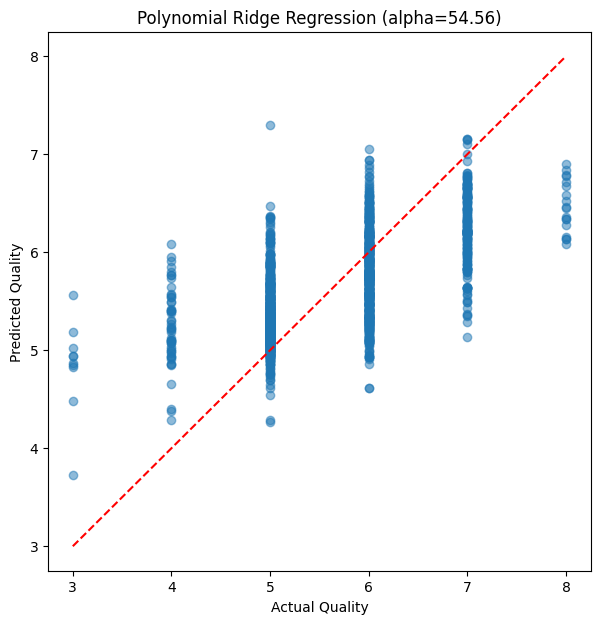

In [18]:
import matplotlib.pyplot as plt

# Get predictions
y_pred = ridge_poly.predict(X_poly_scaled)

# Plot
plt.figure(figsize=(7,7))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Polynomial Ridge Regression (alpha={:.2f})".format(ridge_poly.alpha_))
plt.show()

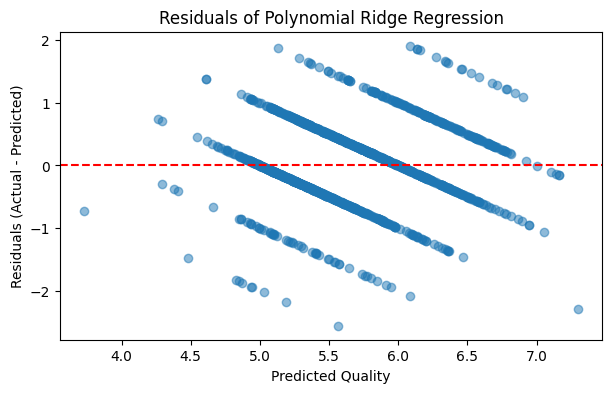

In [19]:
residuals = y - y_pred

plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals of Polynomial Ridge Regression")
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV

def feature_engineering(X, y=None, 
                        poly_degree=2, 
                        variance_thresh=0.0, 
                        lasso_alpha=None, 
                        scale=True):
    """
    Perform feature engineering pipeline:
    1. Polynomial and interaction features.
    2. Remove low-variance features.
    3. (Optional) Feature selection via Lasso.
    4. Standardize features.

    Parameters
    ----------
    X : pd.DataFrame or np.ndarray
        Feature matrix.
    y : array-like, optional
        Target values (needed for Lasso feature selection).
    poly_degree : int, default=2
        Degree for PolynomialFeatures.
    variance_thresh : float, default=0.0
        Threshold for VarianceThreshold.
    lasso_alpha : float or None, default=None
        If provided, use this alpha for Lasso; otherwise, use LassoCV.
    scale : bool, default=True
        Whether to standardize features.

    Returns
    -------
    X_final : np.ndarray
        Transformed feature matrix.
    feature_names : list of str
        Names of the final selected features.
    """

    # 1. Polynomial and interaction features
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(input_features=(X.columns if isinstance(X, pd.DataFrame) else None))

    # 2. Remove low-variance features
    vt = VarianceThreshold(threshold=variance_thresh)
    X_vt = vt.fit_transform(X_poly)
    feature_names = [feature_names[i] for i in range(len(feature_names)) if vt.get_support()[i]]

    # 3. Feature selection via Lasso (if y is provided)
    if y is not None:
        if lasso_alpha is None:
            lasso = LassoCV(cv=5, n_jobs=-1, random_state=42, max_iter=10000)
        else:
            from sklearn.linear_model import Lasso
            lasso = Lasso(alpha=lasso_alpha, max_iter=10000)
        lasso.fit(X_vt, y)
        coef_mask = np.abs(lasso.coef_) > 1e-4
        X_fs = X_vt[:, coef_mask]
        feature_names = [feature_names[i] for i in range(len(feature_names)) if coef_mask[i]]
    else:
        X_fs = X_vt

    # 4. Standardize features
    if scale:
        scaler = StandardScaler()
        X_final = scaler.fit_transform(X_fs)
    else:
        X_final = X_fs

    return X_final, feature_names

# Example usage:
if __name__ == "__main__":
    # Suppose X, y are your dataframes/arrays
    # X = pd.read_csv("features.csv")
    # y = pd.read_csv("target.csv")["target"]
    # Example (uncomment above and set your data):
    # X_fe, fe_names = feature_engineering(X, y)
    pass

In [21]:
# Assuming you have your data loaded as X (DataFrame) and y (Series or array)
X_fe, fe_names = feature_engineering(X, y)

print("Transformed feature matrix shape:", X_fe.shape)
print("First 5 engineered feature names:", fe_names[:5])
print("First 5 rows of engineered features:\n", X_fe[:5])

Transformed feature matrix shape: (1599, 8)
First 5 engineered feature names: ['fixed acidity total sulfur dioxide', 'fixed acidity alcohol', 'volatile acidity total sulfur dioxide', 'residual sugar free sulfur dioxide', 'free sulfur dioxide total sulfur dioxide']
First 5 rows of engineered features:
 [[-0.47239278 -0.84498844 -0.05670728 -0.36648415 -0.48881448 -0.56226413
  -0.46631523 -0.92202638]
 [ 0.5237288  -0.50384121  1.63757499  0.36283836  0.58312828  0.73673286
   0.5833056  -0.59133976]
 [ 0.15101025 -0.50384121  0.77405001 -0.14156836 -0.12957771 -0.16229048
   0.16931488 -0.59133976]
 [ 1.07288218  1.14834279 -0.39402173 -0.1779518   0.04344918  0.01751419
   0.15744134 -0.59133976]
 [-0.47239278 -0.84498844 -0.05670728 -0.36648415 -0.48881448 -0.56226413
  -0.46631523 -0.92202638]]


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_fe, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Regression")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



📊 Linear Regression
R² Score: 0.2982892651276575
RMSE: 0.6771795011851828

📊 Ridge Regression
R² Score: 0.29823821432461495
RMSE: 0.6772041337915231

📊 Lasso Regression
R² Score: 0.29257290449778106
RMSE: 0.6799321671985653

📊 Random Forest Regression
R² Score: 0.5155729165110059
RMSE: 0.5626508131159147

📊 Gradient Boosting Regression
R² Score: 0.4431890391019909
RMSE: 0.6032240259729986
